## **Installing packages**

In [193]:
!pip install numpy;
!pip install matplotlib;
!pip install pandas
!pip install seaborn
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing packages**

In [194]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
import seaborn as sns;
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error;
from sklearn import linear_model;

## **Uploading dataset**

In [195]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## **Preprocessing**

In [196]:
df.drop(df[df["actual_productivity"] > 1].index, inplace = True)
len(df)

1160

In [197]:
df["wip"].fillna(df["wip"].median(), inplace=True)
# df.drop(df[df["wip"].isna()].index, inplace=True)

In [198]:
df['department'] = df['department'].str.replace('finishing ','finishing')

In [199]:
df[df["department"] == 'finishing']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1028.5,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,1028.5,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,1028.5,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,1028.5,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,1028.5,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1028.5,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1028.5,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1028.5,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1028.5,1800,0,0.0,0,0,15.0,0.505889


In [200]:
df[df["incentive"] > 80]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
128,1/8/2015,Quarter2,sweing,Thursday,9,0.80,26.16,1216.0,10620,88,0.0,0,0,59.0,0.900216
172,1/11/2015,Quarter2,sweing,Sunday,9,0.80,26.16,1095.0,10620,88,0.0,0,0,59.0,0.900216
354,1/21/2015,Quarter3,sweing,Wednesday,4,0.75,22.52,825.0,10080,94,0.0,0,0,56.0,0.900556
373,1/22/2015,Quarter4,sweing,Thursday,4,0.75,22.52,759.0,10080,81,0.0,0,0,56.0,0.849984
396,1/24/2015,Quarter4,sweing,Saturday,2,0.75,22.94,1606.0,10260,94,0.0,0,0,57.0,0.900648
397,1/24/2015,Quarter4,sweing,Saturday,4,0.75,22.52,727.0,10260,94,0.0,0,0,57.0,0.900321
422,1/25/2015,Quarter4,sweing,Sunday,4,0.75,22.52,867.0,10260,94,0.0,0,0,57.0,0.900321
423,1/25/2015,Quarter4,sweing,Sunday,2,0.75,22.94,1636.0,10530,81,0.0,0,0,58.5,0.850224
483,1/28/2015,Quarter4,sweing,Wednesday,1,0.75,22.94,1868.0,6960,81,0.0,0,0,58.0,0.850362


In [201]:
df.drop(df[df["incentive"]>100].index, inplace = True)
df.drop(df[df["wip"]>2000].index, inplace = True)
df.drop(df[df["wip"]<100].index, inplace = True)
# df.drop(df[df["over_time"]>10000].index, inplace = True)
# df.drop(df[df["idle_time"]>50].index, inplace = True)

In [202]:
df.drop(axis ="columns", labels="date", inplace = True)
df.drop(axis ="columns", labels="quarter", inplace = True)
df.drop(axis ="columns", labels="day", inplace = True)
df.drop(axis ="columns", labels="team", inplace = True)
df.drop(axis ="columns", labels="department", inplace=True)
df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,1028.5,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [203]:
df[df["no_of_style_change"] > 1]

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
744,0.50,11.41,1039.0,2280,0,0.0,0,2,55.0,0.500123
761,0.60,11.41,1039.0,2280,23,0.0,0,2,55.0,0.600448
777,0.65,11.41,700.0,2640,23,0.0,0,2,53.0,0.650224
799,0.70,11.41,680.0,2160,30,0.0,0,2,54.0,0.565972
813,0.70,11.41,1054.0,3420,30,0.0,0,2,56.0,0.700614
818,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
826,0.70,11.41,685.0,3360,30,0.0,0,2,56.0,0.821113
843,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399
854,0.70,11.41,653.0,3480,30,0.0,0,2,58.0,0.700540
855,0.70,29.40,1116.0,6240,0,0.0,0,2,57.0,0.700000


In [204]:
df.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.727169,14.954534,1011.299024,4589.751553,23.997338,0.773736,0.383319,0.154392,34.178793,0.727195
std,0.099521,11.034077,256.690505,3372.796206,27.651135,13.097489,3.355546,0.433024,22.190635,0.167821
min,0.070000,2.900000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,964.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650211
50%,0.750000,15.090000,1028.500000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.755167
75%,0.800000,24.260000,1068.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.845264
max,0.800000,54.560000,1871.000000,25920.000000,100.000000,300.000000,45.000000,2.000000,89.000000,0.999995


In [205]:
df.drop_duplicates(inplace = True)
df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,1028.5,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125


In [206]:
df.drop(axis = "columns", labels = { "no_of_workers", "idle_time", "smv", "over_time"}, inplace = True)
df.head()

,targeted_productivity,wip,incentive,idle_men,no_of_style_change,actual_productivity
0,0.80,1108.0,98,0,0,0.940725
1,0.75,1028.5,0,0,0,0.886500
2,0.80,968.0,50,0,0,0.800570
4,0.80,1170.0,50,0,0,0.800382
5,0.80,984.0,38,0,0,0.800125


In [207]:
df_norm = df.copy()
  
col = [ "wip", "targeted_productivity", "idle_men", "incentive", "no_of_style_change"]
# col = ["targeted_productivity", "smv", "over_time","incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers"]
# apply normalization techniques
# for column in col :
    # df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max()- df_norm[column].min()) 
  
# apply normalization techniques
for column in col:
    df_norm[column] = (df_norm[column] -df_norm[column].mean()) / df_norm[column].std()    
  
# view normalized data   
display(df_norm) 
  
# view normalized data
df = df_norm
df_norm

,targeted_productivity,wip,incentive,idle_men,no_of_style_change,actual_productivity
0,0.742052,0.371141,2.635082,-0.116506,-0.364462,0.940725
1,0.244474,0.067331,-0.893507,-0.116506,-0.364462,0.886500
2,0.742052,-0.163870,0.906793,-0.116506,-0.364462,0.800570
4,0.742052,0.608074,0.906793,-0.116506,-0.364462,0.800382
5,0.742052,-0.102726,0.474721,-0.116506,-0.364462,0.800125
...,...,...,...,...,...,...
1191,-0.750682,-0.289980,0.042649,-0.116506,1.906094,0.650596
1193,-0.253104,0.067331,-0.893507,-0.116506,-0.364462,0.625625
1194,-0.750682,0.067331,-0.893507,-0.116506,-0.364462,0.625625
1195,0.244474,0.067331,-0.893507,-0.116506,-0.364462,0.505889


,targeted_productivity,wip,incentive,idle_men,no_of_style_change,actual_productivity
0,0.742052,0.371141,2.635082,-0.116506,-0.364462,0.940725
1,0.244474,0.067331,-0.893507,-0.116506,-0.364462,0.886500
2,0.742052,-0.163870,0.906793,-0.116506,-0.364462,0.800570
4,0.742052,0.608074,0.906793,-0.116506,-0.364462,0.800382
5,0.742052,-0.102726,0.474721,-0.116506,-0.364462,0.800125
...,...,...,...,...,...,...
1191,-0.750682,-0.289980,0.042649,-0.116506,1.906094,0.650596
1193,-0.253104,0.067331,-0.893507,-0.116506,-0.364462,0.625625
1194,-0.750682,0.067331,-0.893507,-0.116506,-0.364462,0.625625
1195,0.244474,0.067331,-0.893507,-0.116506,-0.364462,0.505889


In [208]:
# df = df.sample(frac = 1)

In [209]:
# df.drop_duplicates(inplace = True, subset = ["team","wip", "idle_men", "incentive", "targeted_productivity", "no_of_style_change", "no_of_workers"])
Actual = df["actual_productivity"]
dataset = df.drop(axis = "columns", labels = "actual_productivity", inplace = False)
dataset.drop_duplicates()
print(len(Actual), len(dataset))
Actual

1084 1084


0       0.940725
1       0.886500
2       0.800570
4       0.800382
5       0.800125
          ...   
1191    0.650596
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1084, dtype: float64

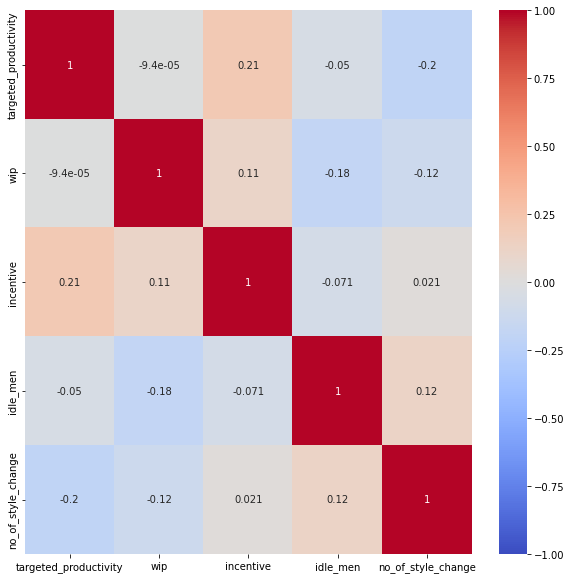

In [210]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), vmin=-1, cmap="coolwarm", annot=True)

In [211]:
dataset.insert(0, "bias", 1)
dataset.head()

,bias,targeted_productivity,wip,incentive,idle_men,no_of_style_change
0,1,0.742052,0.371141,2.635082,-0.116506,-0.364462
1,1,0.244474,0.067331,-0.893507,-0.116506,-0.364462
2,1,0.742052,-0.163870,0.906793,-0.116506,-0.364462
4,1,0.742052,0.608074,0.906793,-0.116506,-0.364462
5,1,0.742052,-0.102726,0.474721,-0.116506,-0.364462


## **Test-Train split**

In [212]:
train = dataset[:880]
trainA = Actual[:880]
test = dataset[881:]
testA = Actual[881:]
train = train.to_numpy()
trainA = trainA.to_numpy()
test = test.to_numpy()
testA = testA.to_numpy()

## **Learning and testing the model**

In [213]:
def findW(x, theta):
  return np.dot(x, theta)

In [214]:
m,n = train.shape
print(train)
theta = np.zeros(n)
print(theta)

[[ 1.          0.74205194  0.37114074  2.63508207 -0.11650616 -0.36446184]
 [ 1.          0.24447412  0.06733111 -0.89350713 -0.11650616 -0.36446184]
 [ 1.          0.74205194 -0.16386993  0.90679348 -0.11650616 -0.36446184]
 ...
 [ 1.          0.24447412  0.06733111 -0.89350713 -0.11650616 -0.36446184]
 [ 1.          0.24447412  0.06733111 -0.89350713 -0.11650616 -0.36446184]
 [ 1.          0.74205194 -0.217371    0.90679348 -0.11650616  4.17664889]]
[0. 0. 0. 0. 0. 0.]


In [215]:
def compute_cost(theta, x, y):
  wtx = findW(x, theta)
  f = np.square(y - wtx)
  j = np.sum(f)/m
  return j
loss = compute_cost(theta, train, trainA)
print(loss)

0.5597636779672641


In [216]:
alpha = 0.02
iterations = 1000

In [217]:
print(theta)
def gradientDescent(x, y, theta, alpha, iterations):
  for i in range (iterations):
    f1 = findW(x, theta) - y
    gradient = np.dot(x.transpose(), f1)
    theta = theta - (2*alpha/m)*gradient
  return theta
theta = gradientDescent(train, trainA, theta, alpha, iterations)
print(theta)

[0. 0. 0. 0. 0. 0.]
[ 0.7258903   0.05969172  0.00670032  0.02932114 -0.02248108 -0.01847154]


In [218]:
loss = compute_cost(theta, train, trainA)
print(loss)

0.02247631372719519


In [219]:
pred = findW(test, theta)
print(pred)

[0.74212062 0.69067149 0.77117292 0.69327153 0.72485375 0.7054162
 0.63922015 0.55457087 0.53411305 0.50388296 0.75378851 0.72408723
 0.82228437 0.77279996 0.77580748 0.77452722 0.75656399 0.66282367
 0.73539121 0.68917153 0.67455464 0.65768113 0.6349834  0.69438595
 0.65064917 0.69438595 0.65278564 0.6349834  0.72408723 0.75378851
 0.69438595 0.75378851 0.66468468 0.74607184 0.82046639 0.72408723
 0.79642287 0.81176045 0.74322632 0.72408723 0.75789547 0.75936887
 0.76920131 0.71771878 0.68817397 0.73841263 0.69438595 0.75378851
 0.66468468 0.75378851 0.75378851 0.75378851 0.7956291  0.77139062
 0.80541033 0.80984005 0.7451628  0.77054669 0.76171066 0.75555368
 0.72408723 0.71439485 0.73334278 0.75378851 0.51617829 0.69438595
 0.69438595 0.69438595 0.72408723 0.25475626 0.75378851 0.75378851
 0.75378851 0.72408723 0.69438595 0.69438595 0.77865857 0.80484701
 0.8238975  0.80261935 0.75771739 0.76621036 0.76452724 0.7252851
 0.73388049 0.75378851 0.69438595 0.57558084 0.5139881  0.753788

## **Evaluate model**

In [220]:
def error(ypred, testA):
  sum = 0
  ypred
  for i in range(len(ypred)):
    difference = np.subtract(testA[i], ypred[i])
    sq = np.square(difference)
    sum += sq
  sum /= len(ypred)

  return sum

In [221]:
def r2_scr(testA, pred, mse):
  num1 = mse*len(testA)
  num2=0
  for i in range(len(testA)):
    num2 += np.square(testA[i]-testA.mean())
  return (1 - num1/num2)


In [222]:
err = error(pred, testA)
print("The mean square error is", err)
print("The r2 score is", r2_scr(testA, pred, err))

The mean square error is 0.014559185890053556
The r2 score is 0.32689511875852495
